## üé•üé¨ ÏòÅÌôîÎ¶¨Î∑∞ ÌÖçÏä§Ìä∏ Í∞êÏÑ±Î∂ÑÏÑùÌïòÍ∏∞ 

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import re
import os
import gensim
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from gensim.models import KeyedVectors
from gensim.models import word2vec
from collections import Counter
from konlpy.tag import Mecab
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.layers import GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.initializers import Constant
from gensim.models.keyedvectors import Word2VecKeyedVectors
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers

### 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÏôÄ ÌôïÏù∏

In [2]:
# Îç∞Ïù¥ÌÑ∞ ÏùΩÏñ¥Ïò§Í∏∞
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

### 1.1 Train Data ÌôïÏù∏

In [3]:
print(train_data.shape)
train_data.head()

(150000, 3)


id                                           document  label
0   9976970                                ÏïÑ ÎçîÎπô.. ÏßÑÏßú ÏßúÏ¶ùÎÇòÎÑ§Ïöî Î™©ÏÜåÎ¶¨      0
1   3819312                  Ìù†...Ìè¨Ïä§ÌÑ∞Î≥¥Í≥† Ï¥àÎî©ÏòÅÌôîÏ§Ñ....Ïò§Î≤ÑÏó∞Í∏∞Ï°∞Ï∞® Í∞ÄÎ≥çÏßÄ ÏïäÍµ¨ÎÇò      1
2  10265843                                  ÎÑàÎ¨¥Ïû¨Î∞ìÏóàÎã§Í∑∏ÎûòÏÑúÎ≥¥ÎäîÍ≤ÉÏùÑÏ∂îÏ≤úÌïúÎã§      0
3   9045019                      ÍµêÎèÑÏÜå Ïù¥ÏïºÍ∏∞Íµ¨Î®º ..ÏÜîÏßÅÌûà Ïû¨ÎØ∏Îäî ÏóÜÎã§..ÌèâÏ†ê Ï°∞Ï†ï      0
4   6483659  ÏÇ¨Ïù¥Î™¨ÌéòÍ∑∏Ïùò ÏùµÏÇ¥Ïä§Îü∞ Ïó∞Í∏∞Í∞Ä ÎèãÎ≥¥ÏòÄÎçò ÏòÅÌôî!Ïä§ÌååÏù¥ÎçîÎß®ÏóêÏÑú ÎäôÏñ¥Î≥¥Ïù¥Í∏∞Îßå ÌñàÎçò Ïª§Ïä§Ìã¥ ...      1

### 1.2 Test Data ÌôïÏù∏

In [4]:
print(test_data.shape)
test_data.head()

(50000, 3)


id                                           document  label
0  6270596                                                Íµ≥ „Öã      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             Î≠êÏïº Ïù¥ ÌèâÏ†êÎì§ÏùÄ.... ÎÇòÏÅòÏßÑ ÏïäÏßÄÎßå 10Ï†ê ÏßúÎ¶¨Îäî ÎçîÎçîÏö± ÏïÑÎãàÏûñÏïÑ      0
3  6825595                   ÏßÄÎ£®ÌïòÏßÄÎäî ÏïäÏùÄÎç∞ ÏôÑÏ†Ñ ÎßâÏû•ÏûÑ... ÎèàÏ£ºÍ≥† Î≥¥Í∏∞ÏóêÎäî....      0
4  6723715  3DÎßå ÏïÑÎãàÏóàÏñ¥ÎèÑ Î≥Ñ Îã§ÏÑØ Í∞ú Ï§¨ÏùÑÌÖêÎç∞.. Ïôú 3DÎ°ú ÎÇòÏôÄÏÑú Ï†ú Ïã¨Í∏∞Î•º Î∂àÌé∏ÌïòÍ≤å ÌïòÏ£†??      0

* ÎùºÎ≤® 0Ïù¥ Î∂ÄÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞, ÎùºÎ≤® 1Ïù¥ Í∏çÏ†ïÏ†ÅÏù∏ Î¶¨Î∑∞
* 150,000Í∞úÏùò train dataÏôÄ 50,000Í∞úÏùò test data

### 2. Îç∞Ïù¥ÌÑ∞Î°úÎçî Íµ¨ÏÑ±

* ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú Îã§Î£®Îäî Naver sentiment movie corpus Îç∞Ïù¥ÌÑ∞Ïóê ÏÜçÌïú ÌÖçÏä§Ìä∏Îäî Í∞ÄÍ≥µÎêòÏßÄ ÏïäÏùÄ ÏÉÅÌÉú
* Îç∞Ïù¥ÌÑ∞ Î°úÎçîÎ•º Íµ¨ÏÑ±ÌïòÎäî Ï†àÏ∞®Îäî `imdb.data_loader()` Î©îÏÜåÎìúÏôÄ ÎèôÏùºÌïòÍ≤å ÎèôÏûëÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌïòÎäî Ï†àÏ∞®

### 2.1 Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†úÎ∂ÄÌÑ∞ ÏÑ∏Ìä∏ Î∂ÑÎ¶¨ÍπåÏßÄ

* Îç∞Ïù¥ÌÑ∞Ïùò Ï§ëÎ≥µ Ï†úÍ±∞
* NaN Í≤∞Ï∏°Ïπò Ï†úÍ±∞
* ÌïúÍµ≠Ïñ¥ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÌÜ†ÌÅ∞Ìôî
* Î∂àÏö©Ïñ¥(Stopwords) Ï†úÍ±∞
* ÏÇ¨Ï†Ñ word_to_index Íµ¨ÏÑ±
* ÌÖçÏä§Ìä∏ Ïä§Ìä∏ÎßÅÏùÑ ÏÇ¨Ï†Ñ Ïù∏Îç±Ïä§ Ïä§Ìä∏ÎßÅÏúºÎ°ú Î≥ÄÌôò
* `X_train`, `y_train`, `X_test`, `y_test`, `word_to_index` Î¶¨ÌÑ¥

* ÌïúÍ∏Ä Ï†ïÍ∑úÌëúÌòÑÏãù Ï†ÅÏö© \
https://wikidocs.net/44249

In [5]:
tokenizer = Mecab()
# stopwords: Î∂àÏö©Ïñ¥
stopwords = ['Ïùò','Í∞Ä','Ïù¥','ÏùÄ','Îì§','Îäî','Ï¢Ä','Ïûò','Í±ç','Í≥º','ÎèÑ','Î•º','ÏúºÎ°ú','Ïûê','Ïóê','ÏôÄ','Ìïú','ÌïòÎã§']

def load_data(train_data, test_data, num_words=10000):
    # train data Ï†ÑÏ≤òÎ¶¨
    # Ï§ëÎ≥µ, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞, Í≥µÎ∞±ÏùÑ NULLÎ°ú Î≥ÄÍ≤Ω, Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data['document'] = train_data['document']
    train_data['document'].replace('', np.nan, inplace=True)
    train_data = train_data.dropna(how = 'any')

    # test data Ï†ÑÏ≤òÎ¶¨
    # Ï§ëÎ≥µ, ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞, Í≥µÎ∞±ÏùÑ NULLÎ°ú Î≥ÄÍ≤Ω, Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data['document'] = test_data['document']
    test_data['document'].replace('', np.nan, inplace=True)
    test_data = test_data.dropna(how = 'any')
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # ÌÜ†ÌÅ∞Ìôî
        temp_X = [word for word in temp_X if not word in stopwords] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
        X_test.append(temp_X)
    
    # Îã®Ïñ¥ ÏÇ¨Ï†Ñ
    # <BOS>: Î¨∏Ïû•Ïùò ÏãúÏûëÏßÄÏ†ê, <PAD>: Ìå®Îî©Ïö© Îã®Ïñ¥, <UNK>: ÏÇ¨Ï†ÑÏóê ÏóÜÎäî(Unknown) Îã®Ïñ¥
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}  # {Îã®Ïñ¥:Ïà´Ïûê} ÎîïÏÖîÎÑàÎ¶¨ Íµ¨Ï°∞
    
    # ÌÖçÏä§Ìä∏Î•º Îã®Ïñ¥ ÏÇ¨Ï†Ñ Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

* `load_data()`: data set Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ï Ìè¨Ìï®. Ï§ëÎ≥µ, ÌäπÏàòÎ¨∏Ïûê, Í≤∞Ï∏°ÏπòÎ•º Ï†úÍ±∞ÌïòÍ≥† Í≥µÎ∞±ÏùÑ NULLÎ°ú Î≥ÄÍ≤ΩÌïòÎäî ÎèôÏûë ÏàòÌñâ
* ÌÜ†ÌÅ∞Ìôî ÏßÑÌñâ ÌõÑ `{Îã®Ïñ¥:Ïà´Ïûê}` Ïùò ÎîïÏÖîÎÑàÎ¶¨ `word_to_index`Í∞Ä ÏÉùÏÑ±ÎêòÎäî ÎèôÏãúÏóê Í∞Å Îã®Ïñ¥Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÍ∞Ä Î∂ÄÏó¨ÎêúÎã§.
* Ï†ÑÏ≤¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Î∂ÄÏó¨ÎêúÎã§. 
* ÎÜíÏùÄ Ï†ïÏàòÍ∞Ä Î∂ÄÏó¨Îêú Îã®Ïñ¥Îì§ÏùÄ Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä Îß§Ïö∞ ÎÇÆÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.
* Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä 3Ìöå ÎØ∏ÎßåÏù∏ Îã®Ïñ¥Îì§Ïù¥ Ïù¥ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏñºÎßåÌÅºÏùò ÎπÑÏ§ëÏùÑ Ï∞®ÏßÄÌïòÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥∏Îã§.
* collections.CounterÌï®Ïàò Ï∞∏Ï°∞ \
https://www.daleseo.com/python-collections-counter/
* Îπ®Í∞Ñ Í≤ΩÍ≥†Ï∞Ω Ï∞∏Í≥† \
https://stackoverflow.com/questions/66603854/futurewarning-the-default-value-of-regex-will-change-from-true-to-false-in-a-fu

In [6]:
threshold = 3
total_cnt = len(word_to_index) # Îã®Ïñ¥Ïùò Ïàò
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

# Îã®Ïñ¥ÏôÄ ÎπàÎèÑÏàòÏùò Ïåç(pair)ÏùÑ keyÏôÄ valueÎ°ú Î∞õÎäîÎã§.
for key, value in word_to_index.items():
    total_freq = total_freq + value

    # Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏúºÎ©¥
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 10000
Îì±Ïû• ÎπàÎèÑÍ∞Ä 2Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 3
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 0.03
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 6.000600060006001e-06


* Îì±Ïû• ÎπàÎèÑÍ∞Ä ÎÇÆÏùÄ Îã®Ïñ¥Í∞Ä ÎßéÏßÄÎèÑ ÏïäÍ≥†, Îã®Ïñ¥Ïùò ÎπÑÏú®ÎèÑ Ïª§Î≥¥Ïù¥ÏßÄÎäî ÏïäÏúºÎÇò,
* ÏõêÎûò Îã®Ïñ¥ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞Í∞Ä Í∑∏Î†áÍ≤å ÌÅ∞ Ìé∏ÎèÑ ÏïÑÎãê ÎøêÎçîÎü¨
* ÏÇ≠Ï†úÌïòÏßÄ ÏïäÎçîÎùºÎèÑ ÌÅ∞ ÏòÅÌñ•ÏùÄ ÏóÜÏñ¥Î≥¥Ïù¥ÎØÄÎ°ú Í∑∏ÎÉ• ÎëîÎã§.

In [7]:
print("number of train data: {}, number of test data: {}".format(len(X_train), len(X_test)))

number of train data: 146182, number of test data: 49157


### 2.2 Îã®Ïñ¥ÏÇ¨Ï†Ñ ÎßåÎì§Í∏∞

In [8]:
# {Ïà´Ïûê:Îã®Ïñ¥}Ïùò index_to_word Îã®Ïñ¥ ÏÇ¨Ï†Ñ ÏÉùÏÑ±
index_to_word = {index:word for word, index in word_to_index.items()}

### 2.3 encode, decode

* `get_encoded_sentence` : Î¨∏Ïû• 1Í∞úÎ•º ÌôúÏö©Ìï† ÎîïÏÖîÎÑàÎ¶¨ÏôÄ Ìï®Íªò Ï£ºÎ©¥, Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú Î≥ÄÌôòÌï¥ Ï£ºÎäî Ìï®Ïàò
* `get_encoded_sentences` : Ïó¨Îü¨ Í∞úÏùò Î¨∏Ïû• Î¶¨Ïä§Ìä∏Î•º ÌïúÍ∫ºÎ≤àÏóê Îã®Ïñ¥ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î≤°ÌÑ∞Î°ú encodeÌï¥ Ï£ºÎäî Ìï®Ïàò
* `get_decoded_sentence` : Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®Ïàò
* `get_decoded_sentences` : Ïó¨Îü¨ Í∞úÏùò Ïà´Ïûê Î≤°ÌÑ∞Î°ú encodeÎêú Î¨∏Ïû•ÏùÑ ÌïúÍ∫ºÎ≤àÏóê ÏõêÎûòÎåÄÎ°ú decodeÌïòÎäî Ìï®Ïàò

In [9]:
# Î™®Îì† Î¨∏Ïû•ÏùÄ <BOS>Î°ú ÏãúÏûëÌïòÎäî Í≤ÉÏúºÎ°ú ÌïúÎã§.
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

def get_decoded_sentence(encoded_sentence, index_to_word):                                                   
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]Î•º ÌÜµÌï¥ <BOS>Î•º Ï†úÏô∏

def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [10]:
# encodeÎêú ÌÖçÏä§Ìä∏Í∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú decodeÎêòÎäîÏßÄ ÌôïÏù∏
# Ï≤´Î≤àÏß∏ Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞
print(X_train[0])
print(get_decoded_sentence(X_train[0], index_to_word))
print('Label: ', y_train[0])

[32, 74, 919, 4, 4, 39, 228, 20, 33, 748]
Îçî Îπô . . ÏßÑÏßú ÏßúÏ¶ù ÎÇò ÎÑ§Ïöî Î™©ÏÜåÎ¶¨
Label:  0


### 3. Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

### 3.1 Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥ Î¨∏Ïû• Í∏∏Ïù¥ Î∂ÑÌè¨ ÌôïÏù∏ÌïòÍ∏∞

### 3.1.1 Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑†, ÏµúÎåÄ, ÌëúÏ§ÄÌé∏Ï∞®

In [11]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞
total_data_text = list(X_train) + list(X_test)

# ÌÖçÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ Î¨∏Ïû•Í∏∏Ïù¥Ïùò Î¶¨Ïä§Ìä∏Î•º ÏÉùÏÑ±Ìïú ÌõÑ
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# Î¨∏Ïû•Í∏∏Ïù¥Ïùò ÌèâÍ∑†Í∞í, ÏµúÎåÄÍ∞í, ÌëúÏ§ÄÌé∏Ï∞®Î•º Í≥ÑÏÇ∞Ìï¥ Î≥∏Îã§. 
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† : ', '%.4f'%np.mean(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ : ', np.max(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® : ', '%.4f'%np.std(num_tokens))
print('Î¨∏Ïû•Í∏∏Ïù¥ Ï§ëÍ∞Ñ Í∞í: {}'.format(np.median(num_tokens)))
# ÏÇ¨Î∂ÑÏúÑÏùò ÎåÄÌïú Í≤ΩÏö∞Îäî 0~100 Ïä§ÏºÄÏùºÎ°ú ÎêòÏñ¥ÏûàÏùå
print('Î¨∏Ïû•Í∏∏Ïù¥ Ï†ú 1 ÏÇ¨Î∂ÑÏúÑ: {}'.format(np.percentile(num_tokens, 25)))
print('Î¨∏Ïû•Í∏∏Ïù¥ Ï†ú 3 ÏÇ¨Î∂ÑÏúÑ: {}'.format(np.percentile(num_tokens, 75)))

# ÏòàÎ•ºÎì§Ïñ¥, ÏµúÎåÄ Í∏∏Ïù¥Î•º (ÌèâÍ∑† + 2*ÌëúÏ§ÄÌé∏Ï∞®)Î°ú ÌïúÎã§Î©¥,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò {:.4f}%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§!'.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

Î¨∏Ïû•Í∏∏Ïù¥ ÌèâÍ∑† :  15.9694
Î¨∏Ïû•Í∏∏Ïù¥ ÏµúÎåÄ :  116
Î¨∏Ïû•Í∏∏Ïù¥ ÌëúÏ§ÄÌé∏Ï∞® :  12.8436
Î¨∏Ïû•Í∏∏Ïù¥ Ï§ëÍ∞Ñ Í∞í: 12.0
Î¨∏Ïû•Í∏∏Ïù¥ Ï†ú 1 ÏÇ¨Î∂ÑÏúÑ: 7.0
Î¨∏Ïû•Í∏∏Ïù¥ Ï†ú 3 ÏÇ¨Î∂ÑÏúÑ: 19.0
pad_sequences maxlen :  41
Ï†ÑÏ≤¥ Î¨∏Ïû•Ïùò 0.9343%Í∞Ä maxlen ÏÑ§Ï†ïÍ∞í Ïù¥ÎÇ¥Ïóê Ìè¨Ìï®Îê©ÎãàÎã§!


* Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä ÌèâÍ∑†Ïù¥ 16Ï†ïÎèÑÏù¥Í≥†, ÏµúÎåìÍ∞íÏù¥ 116ÏúºÎ°ú ÌôïÏù∏Ïù¥ ÎêúÎã§.
* ÏúÑÏóêÏÑúÎäî `maxlen`= 41 Ïù¥ ÎêúÎã§.
* ÌèâÍ∑†Í≥º Ï§ëÍ∞ÑÍ∞íÏóê Ï∞®Ïù¥Í∞Ä Ï¢Ä ÏûàÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä Ìïú Ï™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•Ïù¥ ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêúÎã§.

### 3.1.2 Î¨∏Ïû•Í∏∏Ïù¥ Î∂ÑÌè¨

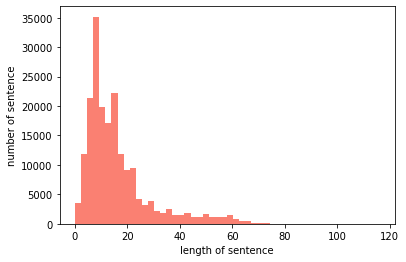

In [12]:
plt.hist(num_tokens, bins=50, color='salmon', label='word')
plt.xlabel('length of sentence')
plt.ylabel('number of sentence')
plt.show()

* ÎåÄÎ∂ÄÎ∂Ñ 20Ïù¥ÌïòÏóê Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

{'whiskers': [<matplotlib.lines.Line2D at 0x7efc7756a8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc7756af40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efc7756a490>],
 'medians': [<matplotlib.lines.Line2D at 0x7efc7757e6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7efc7757edf0>],
 'means': [<matplotlib.lines.Line2D at 0x7efc7757ea60>]}

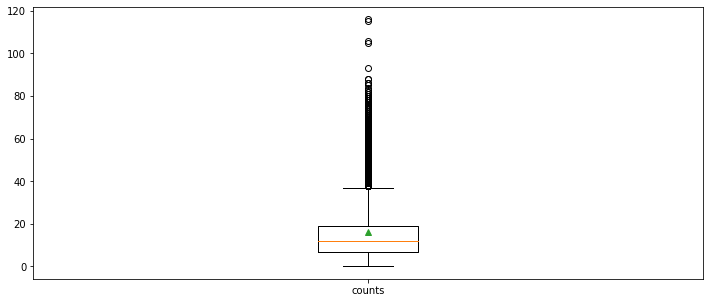

In [13]:
plt.figure(figsize=(12,5))
plt.boxplot(num_tokens, labels=['counts'], showmeans=True)

* Ïù¥ÏÉÅÏπòÍ∞Ä Ï¢Ä ÎßéÏù¥ ÌôïÏù∏Ïù¥ ÎêòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§.
* Î¨∏Ïû•Í∏∏Ïù¥Ïùò Î∂ÑÌè¨Í∞Ä 20Ïù¥ÌïòÏóêÏÑú ÎåÄÎ∂ÄÎ∂Ñ Î™∞Î†§ ÏûàÏñ¥ ÏúÑÏôÄ Í∞ôÏùÄ ÌòÑÏÉÅÏù¥ ÎÇòÌÉÄÎÇú ÎìØÌïòÎã§.
* Î¨∏Ïû•Í∏∏Ïù¥Î•º `maxlen`Ïù∏ 41Ïóê ÎßûÏ∂∞ ÏßÑÌñâÌïòÎ©¥ Ïù¥ÏÉÅÏπòÍ∞Ä Ïñ¥Îäê Ï†ïÎèÑ ÏÇ≠Ï†úÎêòÏñ¥Ïßà Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§.

### 4. Î™®Îç∏ Íµ¨ÏÑ±ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Í∞ÄÍ≥µ

* `keras.preprocessing.sequence.pad_sequences`ÏùÑ ÌôúÏö©ÌïòÏó¨ Ìå®Îî©ÏùÑ Ï∂îÍ∞Ä
* RNNÏùÄ ÏûÖÎ†•Îç∞Ïù¥ÌÑ∞Ïùò Ï≤òÎ¶¨ ÏàúÏÑú ÎïåÎ¨∏Ïóê preÍ∞Ä Ìõ®Ïî¨ Ïú†Î¶¨ÌïòÎ©∞, 10% Ïù¥ÏÉÅÏùò ÌÖåÏä§Ìä∏ ÏÑ±Îä• Ï∞®Ïù¥Î•º Î≥¥Ïù¥Í≤å ÎêúÎã§.
* Ïã§Ï†úÎ°ú Í∑∏Îü¨ÌïúÏßÄ ÌôïÏù∏Ìï¥Î≥∏Îã§.

### 4.1 pre padding

In [14]:
X_train_pre = tf.keras.preprocessing.sequence.pad_sequences(X_train, value=word_to_index["<PAD>"],
                                                        padding='pre', maxlen=maxlen)

X_test_pre = tf.keras.preprocessing.sequence.pad_sequences(X_test, value=word_to_index["<PAD>"],
                                                        padding='pre', maxlen=maxlen)

print(X_train_pre.shape)
print(X_test_pre.shape)

(146182, 41)
(49157, 41)


In [15]:
# Ï≤´ Î≤àÏß∏ Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞
# Î¨∏Ïû• ÏïûÏóê padding
print(X_train_pre[0])
print(get_decoded_sentence(X_train_pre[0], index_to_word))
print('Label: ', y_train[0])  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  32  74 919   4   4
  39 228  20  33 748]
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> ÏïÑ Îçî Îπô . . ÏßÑÏßú ÏßúÏ¶ù ÎÇò ÎÑ§Ïöî Î™©ÏÜåÎ¶¨
Label:  0


### 4.1 post padding

In [16]:
X_train_post = tf.keras.preprocessing.sequence.pad_sequences(X_train, value=word_to_index["<PAD>"],
                                                        padding='post', maxlen=maxlen)

X_test_post = tf.keras.preprocessing.sequence.pad_sequences(X_test, value=word_to_index["<PAD>"],
                                                        padding='post', maxlen=maxlen)

print(X_train_post.shape)
print(X_test_post.shape)

(146182, 41)
(49157, 41)


In [17]:
# Ï≤´ Î≤àÏß∏ Î¶¨Î∑∞Îç∞Ïù¥ÌÑ∞
# Î¨∏Ïû• Îí§Ïóê padding
print(X_train_post[0])
print(get_decoded_sentence(X_train_post[0], index_to_word))
print('Label: ', y_train[0])  

[ 32  74 919   4   4  39 228  20  33 748   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0]
Îçî Îπô . . ÏßÑÏßú ÏßúÏ¶ù ÎÇò ÎÑ§Ïöî Î™©ÏÜåÎ¶¨ <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Label:  0


### 5. validation set Î∞è Î™®Îç∏ Íµ¨ÏÑ±

### 5.1 validation set Ï§ÄÎπÑ

* 146182Í∞úÏùò train ÏÑ∏Ìä∏ Ï§ëÏóê 43000Í∞úÎ•º validation ÏÑ∏Ìä∏Î°ú ÏÇ¨Ïö©ÌïúÎã§. (ÏïΩ 0.3%)

In [18]:
# validation set 43000Í±¥ Î∂ÑÎ¶¨
X_val_pre = X_train_pre[:43000]    # pre Ìå®Îî©Îêú train set Î∂ÑÎ¶¨
X_val_post = X_train_post[:43000]  # post Ìå®Îî©Îêú train set Î∂ÑÎ¶¨
y_val = y_train[:43000]

# validation setÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ
partial_X_train_pre = X_train_pre[43000:]
partial_X_train_post = X_train_post[43000:]
partial_y_train = y_train[43000:]


# validation set Í∞ØÏàò 
print('X_val_pre :', X_val_pre.shape)
print('X_val_post :', X_val_post.shape)
print('y_val :', y_val.shape)

# ÎÇòÎ®∏ÏßÄ train set Í∞ØÏàò
print('partial_X_train_pre :', partial_X_train_pre.shape)
print('partial_X_train_post :', partial_X_train_post.shape)
print('partial_y_train :', partial_y_train.shape)

X_val_pre : (43000, 41)
X_val_post : (43000, 41)
y_val : (43000,)
partial_X_train_pre : (103182, 41)
partial_X_train_post : (103182, 41)
partial_y_train : (103182,)


### 5.2 Î™®Îç∏ Íµ¨ÏÑ±

* Îã§ÏñëÌïú RNNÎ™®Îç∏ ÏÇ¨Ïö©
  * RNN(Recurrent Neural Network) \
  https://jiho-ml.com/weekly-nlp-18/
  * GRU(Gated Recurrent Unit) : LSTMÏùò Í∞ÑÏÜåÎ≤ÑÏ†Ñ \
  https://hyen4110.tistory.com/26
  * LSTM(Long Term Short Memory) \
  https://dgkim5360.tistory.com/entry/understanding-long-short-term-memory-lstm-kr
  * BiLSTM \
  https://ratsgo.github.io/natural%20language%20processing/2017/10/22/manning/ \
  https://keras.io/api/layers/recurrent_layers/bidirectional/
* 1D CNN(Convolutional Neural Network) \
https://gmnam.tistory.com/274

### 5.2.1 RNN(Recurrent Neural Network)

In [19]:
# RNN(Recurrent Neural Network)_pre

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

# Î™®Îç∏ÏùÄ Îã§ ÎåÄ Ïùº Íµ¨Ï°∞Ïùò RNN ÏÇ¨Ïö©
# ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî relu, sigmoid ÏÇ¨Ïö©
model1 = Sequential()
model1.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model1.add(SimpleRNN(32))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1568      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 161,601
Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


In [20]:
# RNN(Recurrent Neural Network)_post

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

# Î™®Îç∏ÏùÄ Îã§ ÎåÄ Ïùº Íµ¨Ï°∞Ïùò RNN ÏÇ¨Ïö©
# ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî relu, sigmoid ÏÇ¨Ïö©
model2 = Sequential()
model2.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model2.add(SimpleRNN(32))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1568      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 161,601
Trainable params: 161,601
Non-trainable params: 0
_________________________________________________________________


### 5.2.2 GRU(Gated Recurrent Unit)

In [21]:
# GRU(Gated Recurrent Unit)_pre

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

# Î™®Îç∏ÏùÄ Îã§ ÎåÄ Ïùº Íµ¨Ï°∞Ïùò GRU ÏÇ¨Ïö©
# ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî sigmoid ÏÇ¨Ïö©
model3 = Sequential()
model3.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model3.add(GRU(128))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
gru (GRU)                    (None, 128)               56064     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 216,193
Trainable params: 216,193
Non-trainable params: 0
_________________________________________________________________


In [22]:
# GRU(Gated Recurrent Unit)_post

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

# Î™®Îç∏ÏùÄ Îã§ ÎåÄ Ïùº Íµ¨Ï°∞Ïùò GRU ÏÇ¨Ïö©
# ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî sigmoid ÏÇ¨Ïö©
model4 = Sequential()
model4.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model4.add(GRU(128))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               56064     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 216,193
Trainable params: 216,193
Non-trainable params: 0
_________________________________________________________________


### 5.2.3 LSTM(Long Term Short Memory)

In [23]:
# LSTM(Long Term Short Memory)_pre

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

#  Î™®Îç∏ÏùÄ Îã§ ÎåÄ Ïùº Íµ¨Ï°∞Ïùò LSTM ÏÇ¨Ïö©
# ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî relu, softmax ÏÇ¨Ïö©
model5 = Sequential()
model5.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model5.add(LSTM(8))  # LSTM state Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='softmax'))  

model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


In [24]:
# LSTM(Long Term Short Memory)_post

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

#  Î™®Îç∏ÏùÄ Îã§ ÎåÄ Ïùº Íµ¨Ï°∞Ïùò LSTM ÏÇ¨Ïö©
# ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî relu, softmax ÏÇ¨Ïö©
model6 = Sequential()
model6.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model6.add(LSTM(8))  # LSTM state Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)
model6.add(Dense(8, activation='relu'))
model6.add(Dense(1, activation='softmax'))  

model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 160,881
Trainable params: 160,881
Non-trainable params: 0
_________________________________________________________________


### 5.2.4 BiLSTM(ÏñëÎ∞©Ìñ• LSTM)

In [25]:
# BiLSTM_pre

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

model7 = Sequential()
model7.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model7.add(Bidirectional(LSTM(128))) # Bidirectional LSTMÏùÑ ÏÇ¨Ïö©
model7.add(Dense(1, activation='sigmoid'))

model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               148480    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 308,737
Trainable params: 308,737
Non-trainable params: 0
_________________________________________________________________


In [26]:
# BiLSTM_post

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

model8 = Sequential()
model8.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model8.add(Bidirectional(LSTM(128))) # Bidirectional LSTMÏùÑ ÏÇ¨Ïö©
model8.add(Dense(1, activation='sigmoid'))

model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               148480    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 308,737
Trainable params: 308,737
Non-trainable params: 0
_________________________________________________________________


### 5.2.5 1-D CNN(Convolution Neural Network)

In [27]:
# 1-D CNN_pre

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

# Ïª§ÎÑêÏùò ÌÅ¨Í∏∞Îäî 3Ïù¥Î©∞ Ìï¥Îãπ Ïª§ÎÑêÏùÄ Ï¥ù 16Í∞ú ÏÇ¨Ïö©
#  Ìï¥Îãπ Î™®Îç∏ÏùÄ ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî relu, sigmoid ÏÇ¨Ïö©
model9 = Sequential()
model9.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model9.add(Conv1D(16, 3, activation='relu'))
model9.add(MaxPooling1D(5))
model9.add(Conv1D(16, 3, activation='relu'))
model9.add(GlobalMaxPooling1D())
model9.add(Dense(8, activation='relu'))
model9.add(Dense(1, activation='sigmoid'))

model9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [28]:
# 1-D CNN_post

vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

# Ïª§ÎÑêÏùò ÌÅ¨Í∏∞Îäî 3Ïù¥Î©∞ Ìï¥Îãπ Ïª§ÎÑêÏùÄ Ï¥ù 16Í∞ú ÏÇ¨Ïö©
# Ìï¥Îãπ Î™®Îç∏ÏùÄ ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî relu, sigmoid ÏÇ¨Ïö©
model10 = Sequential()
model10.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model10.add(Conv1D(16, 3, activation='relu'))
model10.add(MaxPooling1D(5))
model10.add(Conv1D(16, 3, activation='relu'))
model10.add(GlobalMaxPooling1D())
model10.add(Dense(8, activation='relu'))
model10.add(Dense(1, activation='sigmoid'))

model10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

### 6. Î™®Îç∏ ÌïôÏäµ Î∞è  ÌèâÍ∞Ä

### 6.1 RNN(Recurrent Neural Network)

### 6.1.1 RNN(Recurrent Neural Network)_pre Î™®Îç∏ ÌïôÏäµ

In [29]:
# RNN(Recurrent Neural Network)_pre
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('RNN_pre_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_RNN_pre = model1.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                             batch_size=128, validation_data=(X_val_pre, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 29s 34ms/step - loss: 0.4322 - acc: 0.7938 - val_loss: 0.3520 - val_acc: 0.8480
Epoch 2/10
807/807 [==============================] - 27s 34ms/step - loss: 0.3277 - acc: 0.8607 - val_loss: 0.3608 - val_acc: 0.8415
Epoch 3/10
807/807 [==============================] - 27s 34ms/step - loss: 0.2828 - acc: 0.8837 - val_loss: 0.3793 - val_acc: 0.8377
Epoch 4/10
807/807 [==============================] - 27s 33ms/step - loss: 0.2301 - acc: 0.9088 - val_loss: 0.4109 - val_acc: 0.8332
Epoch 5/10
807/807 [==============================] - 27s 34ms/step - loss: 0.1849 - acc: 0.9301 - val_loss: 0.4733 - val_acc: 0.8282
Epoch 6/10
807/807 [==============================] - 27s 34ms/step - loss: 0.1512 - acc: 0.9442 - val_loss: 0.5145 - val_acc: 0.8225
Epoch 7/10
807/807 [==============================] - 27s 34ms/step - loss: 0.1261 - acc: 0.9553 - val_loss: 0.5969 - val_acc: 0.8115
Epoch 8/10
807/807 [==============================] - 27s 34ms

### 6.1.2 RNN(Recurrent Neural Network)_pre Î™®Îç∏ ÌèâÍ∞Ä

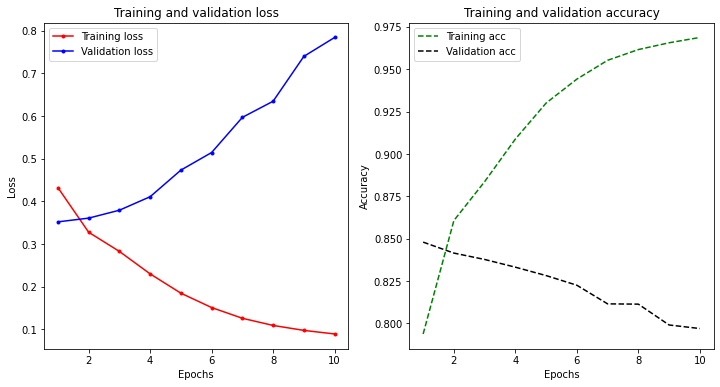

In [30]:
history_RNN_pre_dict = history_RNN_pre.history

acc = history_RNN_pre_dict['acc']
val_acc = history_RNN_pre_dict['val_acc']
loss = history_RNN_pre_dict['loss']
val_loss = history_RNN_pre_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model1.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 6s - loss: 0.8071 - acc: 0.7928
[0.8070661425590515, 0.7927660346031189]


### 6.1.3 RNN(Recurrent Neural Network)_post Î™®Îç∏ ÌïôÏäµ

In [32]:
# RNN(Recurrent Neural Network)_post
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('RNN_post_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_RNN_post = model2.fit(partial_X_train_post, partial_y_train, epochs=10, 
                              batch_size=128, validation_data=(X_val_post, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 28s 34ms/step - loss: 0.4734 - acc: 0.7746 - val_loss: 0.4310 - val_acc: 0.8110
Epoch 2/10
807/807 [==============================] - 27s 34ms/step - loss: 0.3715 - acc: 0.8416 - val_loss: 0.3817 - val_acc: 0.8326
Epoch 3/10
807/807 [==============================] - 27s 34ms/step - loss: 0.3280 - acc: 0.8644 - val_loss: 0.3704 - val_acc: 0.8382
Epoch 4/10
807/807 [==============================] - 27s 34ms/step - loss: 0.2948 - acc: 0.8802 - val_loss: 0.3812 - val_acc: 0.8428
Epoch 5/10
807/807 [==============================] - 27s 34ms/step - loss: 0.2689 - acc: 0.8921 - val_loss: 0.3959 - val_acc: 0.8266
Epoch 6/10
807/807 [==============================] - 27s 34ms/step - loss: 0.2447 - acc: 0.9041 - val_loss: 0.4010 - val_acc: 0.8349
Epoch 7/10
807/807 [==============================] - 27s 34ms/step - loss: 0.2255 - acc: 0.9131 - val_loss: 0.4319 - val_acc: 0.8332
Epoch 8/10
807/807 [==============================] - 27s 34ms

### 6.1.4 RNN(Recurrent Neural Network)_post Î™®Îç∏ ÌèâÍ∞Ä

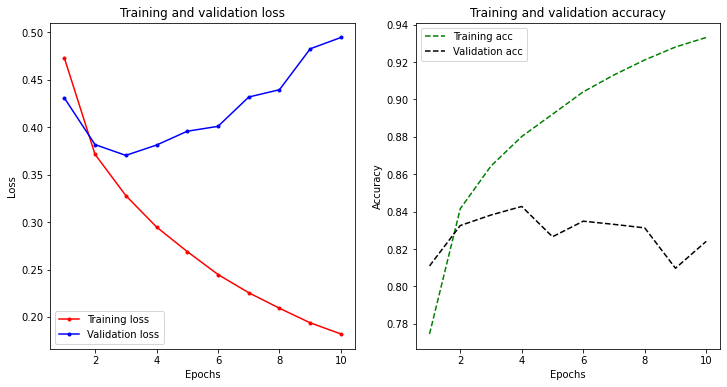

In [33]:
history_RNN_post_dict = history_RNN_post.history

acc = history_RNN_post_dict['acc']
val_acc = history_RNN_post_dict['val_acc']
loss = history_RNN_post_dict['loss']
val_loss = history_RNN_post_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model2.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 6s - loss: 0.5015 - acc: 0.8210
[0.5015251040458679, 0.8210224509239197]


### 6.2 GRU(Gated Recurrent Unit)

### 6.2.1 GRU(Gated Recurrent Unit)_pre Î™®Îç∏ ÌïôÏäµ

In [35]:
# GRU(Gated Recurrent Unit)_pre
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('GRU_pre_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_GRU_pre = model3.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                             batch_size=128, validation_data=(X_val_pre, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 8s 6ms/step - loss: 0.4079 - acc: 0.8102 - val_loss: 0.3578 - val_acc: 0.8430
Epoch 2/10
807/807 [==============================] - 5s 6ms/step - loss: 0.3266 - acc: 0.8599 - val_loss: 0.3402 - val_acc: 0.8519
Epoch 3/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2955 - acc: 0.8764 - val_loss: 0.3335 - val_acc: 0.8563
Epoch 4/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2678 - acc: 0.8899 - val_loss: 0.3326 - val_acc: 0.8580
Epoch 5/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2429 - acc: 0.9021 - val_loss: 0.3494 - val_acc: 0.8546
Epoch 6/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2202 - acc: 0.9120 - val_loss: 0.3687 - val_acc: 0.8519
Epoch 7/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2010 - acc: 0.9213 - val_loss: 0.3946 - val_acc: 0.8509
Epoch 8/10
807/807 [==============================] - 5s 6ms/step - loss: 0.

### 6.2.2 GRU(Gated Recurrent Unit)_pre Î™®Îç∏ ÌèâÍ∞Ä

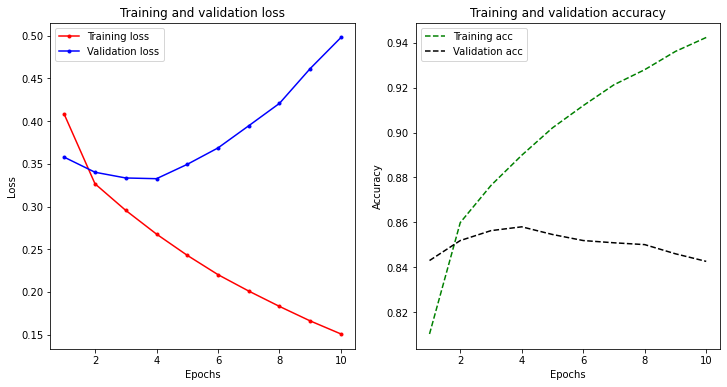

In [36]:
history_GRU_pre_dict = history_GRU_pre.history

acc = history_GRU_pre_dict['acc']
val_acc = history_GRU_pre_dict['val_acc']
loss = history_GRU_pre_dict['loss']
val_loss = history_GRU_pre_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model3.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 3s - loss: 0.5040 - acc: 0.8392
[0.5040484666824341, 0.8392497301101685]


### 6.2.3 GRU(Gated Recurrent Unit)_post Î™®Îç∏ÌïôÏäµ

In [38]:
# GRU(Gated Recurrent Unit)_post
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('GRU_post_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®ÏàòÎ•º ÏÇ¨Ïö©
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_GRU_post = model4.fit(partial_X_train_post, partial_y_train, epochs=10, 
                              batch_size=128, validation_data=(X_val_post, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 6s 6ms/step - loss: 0.5685 - acc: 0.6508 - val_loss: 0.3655 - val_acc: 0.8408
Epoch 2/10
807/807 [==============================] - 5s 6ms/step - loss: 0.3475 - acc: 0.8513 - val_loss: 0.3390 - val_acc: 0.8531
Epoch 3/10
807/807 [==============================] - 5s 6ms/step - loss: 0.3027 - acc: 0.8738 - val_loss: 0.3262 - val_acc: 0.8580
Epoch 4/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2712 - acc: 0.8883 - val_loss: 0.3352 - val_acc: 0.8580
Epoch 5/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2475 - acc: 0.8990 - val_loss: 0.3472 - val_acc: 0.8585
Epoch 6/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2277 - acc: 0.9081 - val_loss: 0.3535 - val_acc: 0.8532
Epoch 7/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2129 - acc: 0.9140 - val_loss: 0.4057 - val_acc: 0.8503
Epoch 8/10
807/807 [==============================] - 5s 6ms/step - loss: 0.

### 6.2.4 GRU(Gated Recurrent Unit)_post Î™®Îç∏ÌèâÍ∞Ä

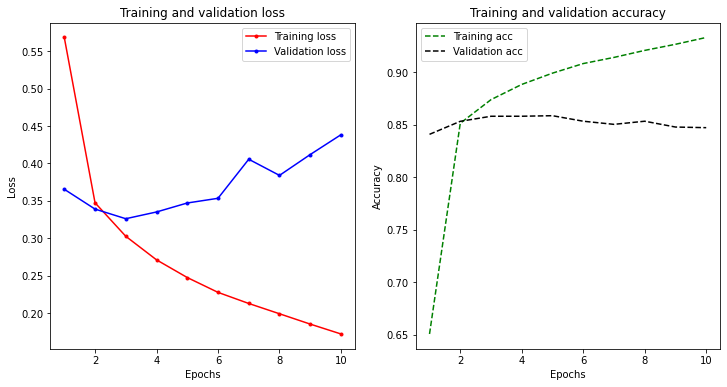

In [39]:
history_GRU_post_dict = history_GRU_post.history

acc = history_GRU_post_dict['acc']
val_acc = history_GRU_post_dict['val_acc']
loss = history_GRU_post_dict['loss']
val_loss = history_GRU_post_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [40]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model4.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 3s - loss: 0.4506 - acc: 0.8402
[0.4506499171257019, 0.8401651978492737]


### 6.3 LSTM(Long Term Short Memory)

### 6.3.1 LSTM(Long Term Short Memory)_pre Î™®Îç∏ÌïôÏäµ

In [41]:
# LSTM(Long Term Short Memory)_pre
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('LSTM_pre_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_LSTM_pre = model5.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                              batch_size=128, validation_data=(X_val_pre, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 6s 6ms/step - loss: 0.4371 - acc: 0.4978 - val_loss: 0.3526 - val_acc: 0.4994
Epoch 2/10
807/807 [==============================] - 4s 6ms/step - loss: 0.3323 - acc: 0.4978 - val_loss: 0.3471 - val_acc: 0.4994
Epoch 3/10
807/807 [==============================] - 4s 6ms/step - loss: 0.3074 - acc: 0.4978 - val_loss: 0.3444 - val_acc: 0.4994
Epoch 4/10
807/807 [==============================] - 4s 6ms/step - loss: 0.2874 - acc: 0.4978 - val_loss: 0.3481 - val_acc: 0.4994
Epoch 5/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2672 - acc: 0.4978 - val_loss: 0.3573 - val_acc: 0.4994
Epoch 6/10
807/807 [==============================] - 4s 6ms/step - loss: 0.2485 - acc: 0.4978 - val_loss: 0.3721 - val_acc: 0.4994
Epoch 7/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2290 - acc: 0.4978 - val_loss: 0.3601 - val_acc: 0.4994
Epoch 8/10
807/807 [==============================] - 4s 6ms/step - loss: 0.

### 6.3.2 LSTM(Long Term Short Memory)_pre Î™®Îç∏ÌèâÍ∞Ä

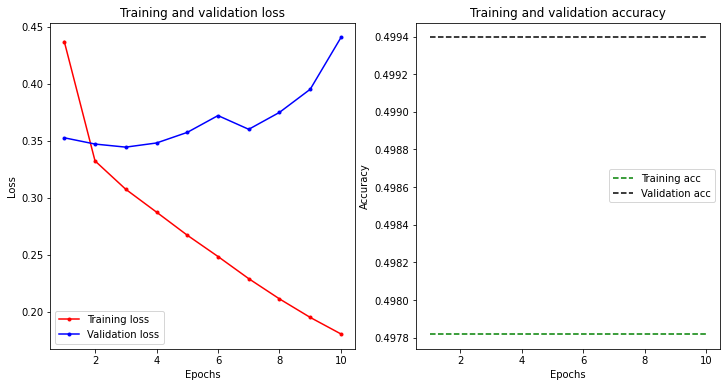

In [42]:
history_LSTM_pre_dict = history_LSTM_pre.history

acc = history_LSTM_pre_dict['acc']
val_acc = history_LSTM_pre_dict['val_acc']
loss = history_LSTM_pre_dict['loss']
val_loss = history_LSTM_pre_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model5.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 3s - loss: 0.4533 - acc: 0.5027
[0.4533293545246124, 0.5026954412460327]


### 6.3.3 LSTM(Long Term Short Memory)_post Î™®Îç∏ÌïôÏäµ

In [44]:
# LSTM(Long Term Short Memory)_post
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('LSTM_post_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_LSTM_post = model6.fit(partial_X_train_post, partial_y_train, epochs=10, 
                               batch_size=128, validation_data=(X_val_post, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 6s 6ms/step - loss: 0.4761 - acc: 0.4978 - val_loss: 0.3532 - val_acc: 0.4994
Epoch 2/10
807/807 [==============================] - 4s 6ms/step - loss: 0.3338 - acc: 0.4978 - val_loss: 0.3434 - val_acc: 0.4994
Epoch 3/10
807/807 [==============================] - 5s 6ms/step - loss: 0.3105 - acc: 0.4978 - val_loss: 0.3597 - val_acc: 0.4994
Epoch 4/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2945 - acc: 0.4978 - val_loss: 0.3512 - val_acc: 0.4994
Epoch 5/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2795 - acc: 0.4978 - val_loss: 0.3670 - val_acc: 0.4994
Epoch 6/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2653 - acc: 0.4978 - val_loss: 0.3772 - val_acc: 0.4994
Epoch 7/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2513 - acc: 0.4978 - val_loss: 0.3888 - val_acc: 0.4994
Epoch 8/10
807/807 [==============================] - 5s 6ms/step - loss: 0.

### 6.3.4 LSTM(Long Term Short Memory)_post Î™®Îç∏ÌèâÍ∞Ä

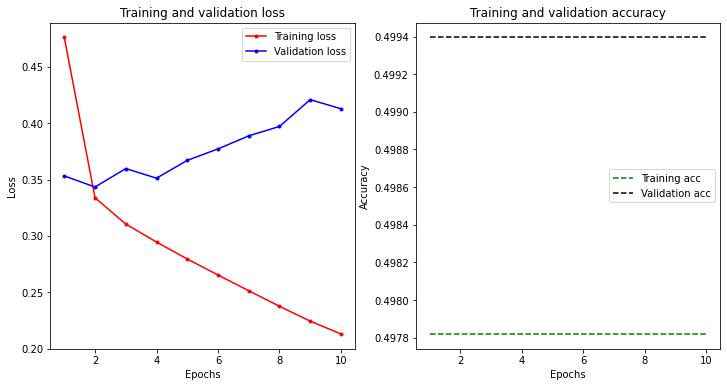

In [45]:
history_LSTM_post_dict = history_LSTM_post.history

acc = history_LSTM_post_dict['acc']
val_acc = history_LSTM_post_dict['val_acc']
loss = history_LSTM_post_dict['loss']
val_loss = history_LSTM_post_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model6.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 3s - loss: 0.4203 - acc: 0.5027
[0.42034462094306946, 0.5026954412460327]


### 6.4 BiLSTM

### 6.3.1 BiLSTM_pre Î™®Îç∏ÌïôÏäµ

In [47]:
# BiLSTM_pre
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('BiLSTM_pre_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_BiLSTM_pre = model7.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                                batch_size=128, validation_data=(X_val_pre, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 10s 10ms/step - loss: 0.4124 - acc: 0.8086 - val_loss: 0.3485 - val_acc: 0.8483
Epoch 2/10
807/807 [==============================] - 7s 8ms/step - loss: 0.3326 - acc: 0.8585 - val_loss: 0.3476 - val_acc: 0.8501
Epoch 3/10
807/807 [==============================] - 7s 9ms/step - loss: 0.3102 - acc: 0.8695 - val_loss: 0.3412 - val_acc: 0.8500
Epoch 4/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2834 - acc: 0.8821 - val_loss: 0.3390 - val_acc: 0.8554
Epoch 5/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2568 - acc: 0.8943 - val_loss: 0.3552 - val_acc: 0.8554
Epoch 6/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2327 - acc: 0.9053 - val_loss: 0.3529 - val_acc: 0.8557
Epoch 7/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2114 - acc: 0.9152 - val_loss: 0.3958 - val_acc: 0.8509
Epoch 8/10
807/807 [==============================] - 7s 9ms/step - loss: 

### 6.3.2 BiLSTM_pre Î™®Îç∏ÌèâÍ∞Ä

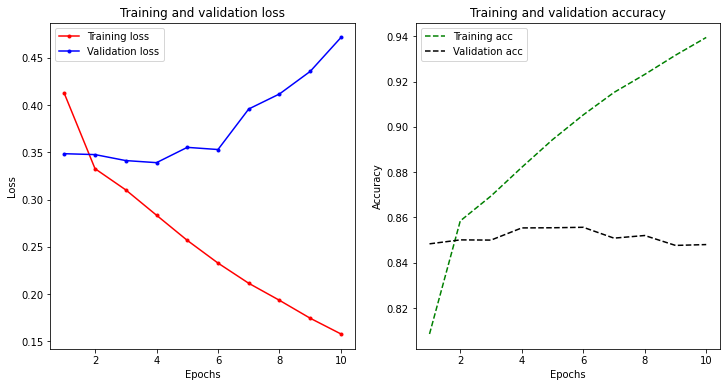

In [48]:
history_BiLSTM_pre_dict = history_BiLSTM_pre.history

acc = history_BiLSTM_pre_dict['acc']
val_acc = history_BiLSTM_pre_dict['val_acc']
loss = history_BiLSTM_pre_dict['loss']
val_loss = history_BiLSTM_pre_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [49]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model7.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 4s - loss: 0.4801 - acc: 0.8435
[0.4800625741481781, 0.843460738658905]


### 6.3.3 BiLSTM_post Î™®Îç∏ÌïôÏäµ

In [50]:
# BiLSTM_post
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('BiLSTM_post_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model8.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_BiLSTM_post = model8.fit(partial_X_train_post, partial_y_train, epochs=10, 
                                 batch_size=128, validation_data=(X_val_post, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 10s 9ms/step - loss: 0.4136 - acc: 0.8075 - val_loss: 0.3625 - val_acc: 0.8467
Epoch 2/10
807/807 [==============================] - 7s 9ms/step - loss: 0.3344 - acc: 0.8575 - val_loss: 0.3661 - val_acc: 0.8396
Epoch 3/10
807/807 [==============================] - 7s 9ms/step - loss: 0.3043 - acc: 0.8737 - val_loss: 0.3353 - val_acc: 0.8538
Epoch 4/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2756 - acc: 0.8870 - val_loss: 0.3445 - val_acc: 0.8549
Epoch 5/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2482 - acc: 0.8998 - val_loss: 0.3556 - val_acc: 0.8538
Epoch 6/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2248 - acc: 0.9104 - val_loss: 0.3693 - val_acc: 0.8524
Epoch 7/10
807/807 [==============================] - 7s 9ms/step - loss: 0.2057 - acc: 0.9190 - val_loss: 0.3914 - val_acc: 0.8508
Epoch 8/10
807/807 [==============================] - 7s 9ms/step - loss: 0

### 6.3.4 BiLSTM_post Î™®Îç∏ÌèâÍ∞Ä

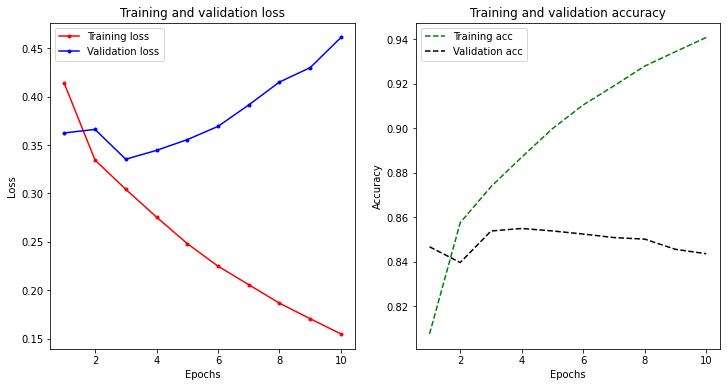

In [51]:
history_BiLSTM_post_dict = history_BiLSTM_post.history

acc = history_BiLSTM_post_dict['acc']
val_acc = history_BiLSTM_post_dict['val_acc']
loss = history_BiLSTM_post_dict['loss']
val_loss = history_BiLSTM_post_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [52]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model8.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 4s - loss: 0.4728 - acc: 0.8393
[0.4728246033191681, 0.8393311500549316]


### 6.4 1-D CNN

### 6.4.1 1-D CNN_pre Î™®Îç∏ÌïôÏäµ

In [53]:
# 1-D CNN_pre
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('1DCNN_pre_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_1DCNN_pre = model9.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                               batch_size=128, validation_data=(X_val_pre, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 5s 5ms/step - loss: 0.5301 - acc: 0.7113 - val_loss: 0.4584 - val_acc: 0.7667
Epoch 2/10
807/807 [==============================] - 4s 5ms/step - loss: 0.4252 - acc: 0.7914 - val_loss: 0.4606 - val_acc: 0.7661
Epoch 3/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3858 - acc: 0.8132 - val_loss: 0.4673 - val_acc: 0.7683
Epoch 4/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3482 - acc: 0.8332 - val_loss: 0.4849 - val_acc: 0.7667
Epoch 5/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3111 - acc: 0.8529 - val_loss: 0.5215 - val_acc: 0.7608
Epoch 6/10
807/807 [==============================] - 4s 5ms/step - loss: 0.2782 - acc: 0.8693 - val_loss: 0.5593 - val_acc: 0.7578
Epoch 7/10
807/807 [==============================] - 4s 5ms/step - loss: 0.2485 - acc: 0.8823 - val_loss: 0.6193 - val_acc: 0.7525
Epoch 8/10
807/807 [==============================] - 4s 5ms/step - loss: 0.

### 6.4.2 1-D CNN_pre Î™®Îç∏ÌèâÍ∞Ä

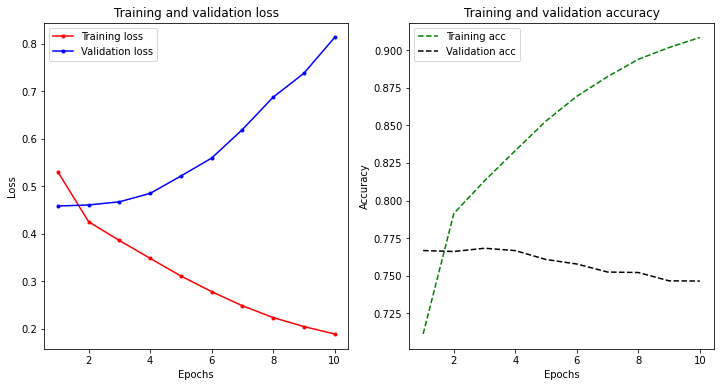

In [54]:
history_1DCNN_pre_dict = history_1DCNN_pre.history

acc = history_1DCNN_pre_dict['acc']
val_acc = history_1DCNN_pre_dict['val_acc']
loss = history_1DCNN_pre_dict['loss']
val_loss = history_1DCNN_pre_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [55]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model9.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 2s - loss: 0.8221 - acc: 0.7440
[0.8220548629760742, 0.7439835667610168]


### 6.4.3 1-D CNN_post Î™®Îç∏ÌïôÏäµ

In [56]:
# 1-D CNN_post
# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ 2Ìöå Ï¶ùÍ∞ÄÌïòÎ©¥ Ï†ïÌï¥ÏßÑ ÏóêÌè¨ÌÅ¨Í∞Ä ÎèÑÎã¨ÌïòÏßÄ Î™ªÌïòÏòÄÎçîÎùºÎèÑ ÌïôÏäµÏùÑ Ï°∞Í∏∞ Ï¢ÖÎ£å(Early Stopping)
# ModelCheckpointÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò Ï†ïÌôïÎèÑ(val_acc)Í∞Ä Ïù¥Ï†ÑÎ≥¥Îã§ Ï¢ãÏïÑÏßà Í≤ΩÏö∞ÏóêÎßå Î™®Îç∏ÏùÑ Ï†ÄÏû•
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
mc = ModelCheckpoint('1DCNN_post_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# ÏÜêÏã§ Ìï®ÏàòÎ°ú ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº Ìï®Ïàò ÏÇ¨Ïö©
model10.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_1DCNN_post = model10.fit(partial_X_train_post, partial_y_train, epochs=10, 
                                 batch_size=128, validation_data=(X_val_post, y_val),verbose=1)

Epoch 1/10
807/807 [==============================] - 4s 5ms/step - loss: 0.4413 - acc: 0.7880 - val_loss: 0.3523 - val_acc: 0.8458
Epoch 2/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3172 - acc: 0.8664 - val_loss: 0.3425 - val_acc: 0.8522
Epoch 3/10
807/807 [==============================] - 4s 5ms/step - loss: 0.2761 - acc: 0.8863 - val_loss: 0.3476 - val_acc: 0.8505
Epoch 4/10
807/807 [==============================] - 4s 5ms/step - loss: 0.2410 - acc: 0.9048 - val_loss: 0.3681 - val_acc: 0.8446
Epoch 5/10
807/807 [==============================] - 4s 5ms/step - loss: 0.2073 - acc: 0.9209 - val_loss: 0.3902 - val_acc: 0.8440
Epoch 6/10
807/807 [==============================] - 4s 5ms/step - loss: 0.1759 - acc: 0.9363 - val_loss: 0.4151 - val_acc: 0.8398
Epoch 7/10
807/807 [==============================] - 4s 5ms/step - loss: 0.1475 - acc: 0.9480 - val_loss: 0.4675 - val_acc: 0.8372
Epoch 8/10
807/807 [==============================] - 4s 5ms/step - loss: 0.

### 6.4.4 1-D CNN_post Î™®Îç∏ÌèâÍ∞Ä

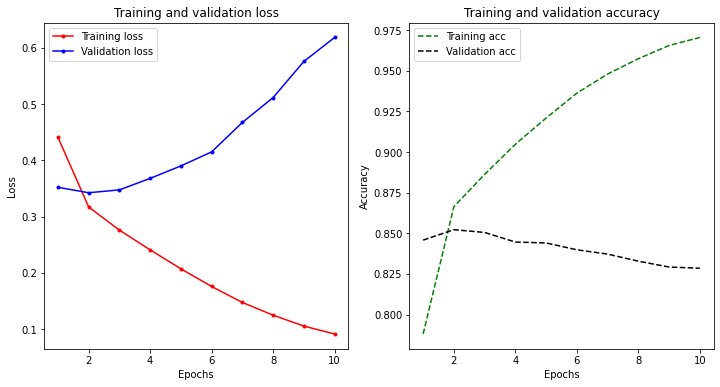

In [57]:
history_1DCNN_post_dict = history_1DCNN_post.history

acc = history_1DCNN_post_dict['acc']
val_acc = history_1DCNN_post_dict['val_acc']
loss = history_1DCNN_post_dict['loss']
val_loss = history_1DCNN_post_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

# loss Í∑∏ÎûòÌîÑ
plt.subplot(1,2,1)
plt.plot(epochs, loss, marker='.', c='red', label='Training loss')
plt.plot(epochs, val_loss, marker='.', c='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# accuracy Í∑∏ÎûòÌîÑ
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'g--', label='Training acc')
plt.plot(epochs, val_acc, 'k--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [58]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model10.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 2s - loss: 0.6249 - acc: 0.8236
[0.6248660087585449, 0.8236466646194458]


### 6.5 Í≤∞Í≥ºÏ†ïÎ¶¨

|Model|Loss|Accuracy|
|:---:|:---:|:---:|
|RNN(pre)|0.8071|0.7928|
|RNN(post)|0.5015|0.8210|
|GRU(pre)|0.5040|0.8392|
|GRU(post)|0.4506|0.8402|
|LSTM(pre)|0.4533|0.5027|
|LSTM(post)|0.4203|0.5027|
|BiLSTM(pre)|0.4801|0.8435|
|BiLSTM(post)|0.4728|0.8393|
|1-D CNN(pre)|0.8221|0.7440|
|1-D CNN(post)|0.6249|0.8236|

* preÏôÄ postÎ•º ÎπÑÍµêÌñàÏùÑ Îïå, postÏùò Ï†ïÌôïÎèÑÍ∞Ä Ïò§ÌûàÎ†§ Îçî ÎÜíÍ≤å ÎÇòÏò§Îäî Í≤ΩÌñ•Ïù¥ ÏûàÏóàÎã§.
* RNNÏùò Í≤ΩÏö∞ Î™®Îç∏ ÏûêÏ≤¥Í∞Ä Í∑∏Î†áÍ≤å Î≥µÏû°Ìïú Î™®Îç∏Ïù¥ ÏïÑÎãàÏó¨ÏÑú ÌÅ∞ ÏòÅÌñ•Ïù¥ ÏóÜÏóàÎçòÍ≤å ÏïÑÎãêÍπå Ï∂îÏ†ïÌï¥Î≥∏Îã§.
* Îã§Î•∏ Î™®Îç∏Îì§Ïùò Í≤ΩÏö∞ Ï∞®Ïù¥ ÌôïÏù∏ÎêòÏßÄÎßå Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÎùºÍ≥† Î≥º ÏàòÎäî ÏóÜÏùÑ Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêúÎã§.
* BiLSTMÏùò Í≤ΩÏö∞ preÏóêÏÑú Ï†ïÌôïÎèÑÍ∞Ä Ï¢Ä Îçî ÎÜíÍ≤å ÌôïÏù∏ÎêòÏóàÎã§.
* 1-D CNNÏùÄ postÏóêÏÑú Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÜíÍ≤å ÌôïÏù∏ÎêòÏóàÎã§. (Ïô§Íπå?)

### 7. ÌïôÏäµÎêú Embedding Î†àÏù¥Ïñ¥ Î∂ÑÏÑù

* Í∞Å Î™®Îç∏(pre)Î≥ÑÎ°ú ÌôïÏù∏Ìï¥Î≥∏Îã§. 
* 1-D CNN Î™®Îç∏ÏùÄ postÎ°ú ÌôïÏù∏Ìï¥Î≥∏Îã§.

### 7.1 RNN(Recurrent Neural Network)

In [59]:
embedding_layer = model1.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [60]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model1.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [61]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('Ïä¨ÌçºÏöî', 0.9107797145843506),
 ('Ïù¥ÏòÅÏï†', 0.9085221290588379),
 ('Ïù¥Ï†úÏÑúÏïº', 0.9017857909202576),
 ('ÌÉÑÌÉÑ', 0.8974224328994751),
 ('Ìù†Ïû°', 0.8959842920303345),
 ('ÌõåÏ©ç', 0.8940876126289368),
 ('ÎààÎ¨ºÎÇò', 0.8932272791862488),
 ('Ïã¨Ïû•', 0.8890641927719116),
 ('ÎπÑÎ≤î', 0.8889443874359131),
 ('Ïö∏Ïª•', 0.8847728371620178)]

### 7.2 GRU(Gated Recurrent Unit)

In [62]:
embedding_layer = model3.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [63]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model3.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [64]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('ÎäêÎÇÄ', 0.9651418328285217),
 ('ÏÜåÏúÑ', 0.9531208276748657),
 ('ÏàúÏàò', 0.9523293375968933),
 ('Îã§ÏÑØ', 0.9498942494392395),
 ('Ìëπ', 0.9436818957328796),
 ('Îã¨Îûê', 0.9425501227378845),
 ('ÏÇ¨ÏïÖ', 0.9422340989112854),
 ('Í∞êÏÇ¨', 0.94188392162323),
 ('Íº¨Î∞ïÍº¨Î∞ï', 0.9415031671524048),
 ('ÏÑ§Î†àÏòÄ', 0.9403830766677856)]

### 7.3 LSTM(Long Term Short Memory)

In [65]:
embedding_layer = model5.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [66]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model5.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [67]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('Îç∞Ïöî', 0.9670685529708862),
 ('ÏûòÏÉùÍ∏¥', 0.9599155187606812),
 ('Ïõ∞', 0.957840085029602),
 ('Íµµ', 0.9573618173599243),
 ('Í∞àÏ¶ù', 0.9544306993484497),
 ('Íπ®Îã¨Ïùå', 0.9519877433776855),
 ('Ï¢ãÏïÑÌï¥ÏÑú', 0.9480651617050171),
 ('ÌçºÏÑºÌä∏', 0.9467475414276123),
 ('Í≥ÑÏãú', 0.9456287622451782),
 ('Î∞â', 0.9443857669830322)]

### 7.4 BiLSTM

In [68]:
embedding_layer = model7.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [69]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model7.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [70]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('ÎäêÎÇÄ', 0.9663518667221069),
 ('ÏúºÎ°úÏç®', 0.9629613161087036),
 ('Î∞òÌï¥', 0.9598175883293152),
 ('Í∑ÄÏó¨Ïö¥', 0.9597281217575073),
 ('Í∞ïÏ∂î', 0.9582736492156982),
 ('Ïù¥ÏòÅÏï†', 0.955153226852417),
 ('ÎßåÎä•', 0.9543163776397705),
 ('Ïó¨Ïö¥', 0.9524645805358887),
 ('ÎßùÏÑ§Ïù¥', 0.9519038200378418),
 ('ÏÜåÏ£º', 0.9510482549667358)]

### 7.5 1-D CNN

In [71]:
embedding_layer = model10.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [72]:
# ÌïôÏäµÌïú Embedding ÌååÎùºÎØ∏ÌÑ∞Î•º ÌååÏùºÏóê Ïç®ÏÑú Ï†ÄÏû•Ìï©ÎãàÎã§. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # Î™áÍ∞úÏùò Î≤°ÌÑ∞Î•º ÏñºÎßà ÏÇ¨Ïù¥Ï¶àÎ°ú Í∏∞Ïû¨Ìï†ÏßÄ ÌÉÄÏù¥ÌãÄÏùÑ ÏîÅÎãàÎã§.

# Îã®Ïñ¥ Í∞úÏàò(ÏóêÏÑú ÌäπÏàòÎ¨∏Ïûê 4Í∞úÎäî Ï†úÏô∏ÌïòÍ≥†)ÎßåÌÅºÏùò ÏõåÎìú Î≤°ÌÑ∞Î•º ÌååÏùºÏóê Í∏∞Î°ùÌï©ÎãàÎã§. 
vectors = model10.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [73]:
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
word_vectors.similar_by_word("ÏÇ¨Îûë")

[('Î©ãÏ°å', 0.9075969457626343),
 ('Í≥†Í∏â', 0.8588581085205078),
 ('Î∂â', 0.8527008295059204),
 ('ÏßÅÏóÖ', 0.8493726849555969),
 ('ÏûêÏ°¥Ïã¨', 0.8429847955703735),
 ('Îî∞Îúª', 0.8395630717277527),
 ('Î∞§', 0.8392130136489868),
 ('ÏÜåÌôî', 0.8342572450637817),
 ('Ìå®Î∞∞', 0.8272861838340759),
 ('Ïä§ÎßàÌä∏Ìè∞', 0.8238996267318726)]

* Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú `ÏÇ¨Îûë`Í≥º Í¥ÄÎ†®ÏóÜÎäî Îã®Ïñ¥Îì§Ïù¥ Ï∂úÎ†•ÎêúÎã§.

### 8. ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© ÌôúÏö©ÌïòÏó¨ ÏÑ±Îä• Í∞úÏÑ†

### 8.1 ÌïúÍµ≠Ïñ¥ Word2Vec ÏûÑÎ≤†Îî© ÌôïÏù∏

In [74]:
# gensim Ìå®ÌÇ§ÏßÄ Î≤ÑÏ†Ñ ÏïåÏïÑÎ≥¥Í∏∞

import gensim
gensim.__version__

'3.8.3'

In [75]:
# gensim Ìå®ÌÇ§ÏßÄ Î≤ÑÏ†Ñ down grade
!pip install --upgrade gensim==3.8.3

In [76]:
# ÌïúÍµ≠Ïñ¥ Word2Vec ÌååÏùº Î∂àÎü¨ÏôÄ ko_modelÏóê Ï†ÄÏû•ÌïòÍ∏∞

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
ko_model = gensim.models.Word2Vec.load(word2vec_path)

In [77]:
# Ïú†ÏÇ¨Ìïú Îã®Ïñ¥ÏôÄ Í∑∏ Ïú†ÏÇ¨ÎèÑ ÌôïÏù∏
ko_model.wv.most_similar("ÏÇ¨Îûë")

[('Ïä¨Ìîî', 0.7216662764549255),
 ('ÌñâÎ≥µ', 0.6759077310562134),
 ('Ï†àÎßù', 0.6468985080718994),
 ('Í∏∞ÏÅ®', 0.6458414196968079),
 ('Ïù¥Î≥Ñ', 0.6334798336029053),
 ('Ï∂îÏñµ', 0.6320937275886536),
 ('Ïù∏ÏÉù', 0.6216273307800293),
 ('Ïï†Ï†ï', 0.6206069588661194),
 ('Ïó∞Ïù∏', 0.6186063289642334),
 ('Ïú†Ìòπ', 0.5965287685394287)]

* Ïó≠Ïãú Í±∞Ïù∏! ÏÇ¨ÎûëÏù¥Îûë ÎπÑÏä∑Ìïú Îã®Ïñ¥Îì§ÏùÑ Ï∂úÎ†•ÌïúÎã§.

### 8.2 Í∞Å Î™®Îç∏ Î≥Ñ ÏÑ±Îä• Í∞úÏÑ† ÌôïÏù∏

* Ïù¥Ï†ú ÌïúÍµ≠Ïñ¥ Word2VecÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ïù¥Ï†ÑÏùò Î™®Îç∏ÏùÑ Îã§Ïãú ÌïôÏäµÏãúÌÇ§Í≥† ÌèâÍ∞ÄÌïúÎã§.

In [78]:
vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞ÏûÖÎãàÎã§(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 200  # ÏõåÎìú Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

# ÏÇ¨Ï†ÑÌïôÏäµÎêú ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥Ïùò Ï∞®Ïõê Ïàò Í∑∏ÎåÄÎ°ú Îî∞ÎùºÍ∞ÄÎäî Í≤ÉÏù¥ Ï¢ãÎã§
embedding_matrix = np.random.rand(vocab_size, word_vector_dim) 

# embedding_matrixÏóê Word2Vec ÏõåÎìú Î≤°ÌÑ∞Î•º Îã®Ïñ¥ ÌïòÎÇòÏî©ÎßàÎã§ Ï∞®Î°ÄÏ∞®Î°Ä Ïπ¥ÌîºÌïúÎã§.
for i in range(4,vocab_size):
    if index_to_word[i] in ko_model:
        embedding_matrix[i] = ko_model[index_to_word[i]]

/tmp/ipykernel_1012/3143846063.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in ko_model:
/tmp/ipykernel_1012/3143846063.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = ko_model[index_to_word[i]]


In [79]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

### 8.2.1 RNN(Recurrent Neural Network)

In [80]:
model_rnn = Sequential()
model_rnn.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                7456      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 2,007,489
Trainable params: 2,007,489
Non-trainable params: 0
_________________________________________________________________


In [81]:
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history_rnn = model_rnn.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                            batch_size=128, validation_data=(X_val_pre, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
807/807 [==============================] - 29s 35ms/step - loss: 0.4031 - acc: 0.8165 - val_loss: 0.3466 - val_acc: 0.8499
Epoch 2/10
807/807 [==============================] - 28s 35ms/step - loss: 0.2985 - acc: 0.8753 - val_loss: 0.3571 - val_acc: 0.8481
Epoch 3/10
807/807 [==============================] - 28s 35ms/step - loss: 0.2210 - acc: 0.9136 - val_loss: 0.4038 - val_acc: 0.8378
Epoch 4/10
807/807 [==============================] - 29s 35ms/step - loss: 0.1577 - acc: 0.9413 - val_loss: 0.4664 - val_acc: 0.8231
Epoch 5/10
807/807 [==============================] - 28s 35ms/step - loss: 0.1173 - acc: 0.9580 - val_loss: 0.5320 - val_acc: 0.8254
Epoch 00005: early stopping


In [82]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model_rnn.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 7s - loss: 0.5486 - acc: 0.8209
[0.548614501953125, 0.8208800554275513]


### 8.2.2 GRU(Gated Recurrent Unit)

In [83]:
model_gru = Sequential()
model_gru.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_gru.add(GRU(128))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               126720    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 2,126,849
Trainable params: 2,126,849
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history_gru = model_gru.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                            batch_size=128, validation_data=(X_val_pre, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
807/807 [==============================] - 7s 7ms/step - loss: 0.3830 - acc: 0.8261 - val_loss: 0.3280 - val_acc: 0.8563
Epoch 2/10
807/807 [==============================] - 5s 7ms/step - loss: 0.2912 - acc: 0.8771 - val_loss: 0.3181 - val_acc: 0.8620
Epoch 3/10
807/807 [==============================] - 5s 7ms/step - loss: 0.2482 - acc: 0.8974 - val_loss: 0.3280 - val_acc: 0.8589
Epoch 4/10
807/807 [==============================] - 5s 7ms/step - loss: 0.2104 - acc: 0.9144 - val_loss: 0.3481 - val_acc: 0.8577
Epoch 5/10
807/807 [==============================] - 5s 7ms/step - loss: 0.1747 - acc: 0.9307 - val_loss: 0.3916 - val_acc: 0.8520
Epoch 6/10
807/807 [==============================] - 5s 7ms/step - loss: 0.1428 - acc: 0.9447 - val_loss: 0.4386 - val_acc: 0.8501
Epoch 00006: early stopping


In [85]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model_gru.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 3s - loss: 0.4422 - acc: 0.8463
[0.442204087972641, 0.8462680578231812]


### 8.2.3 LSTM(Long Term Short Memory)

In [86]:
# Î™®Îç∏ Íµ¨ÏÑ±(LMST ÏÇ¨Ïö©)

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(LSTM(8))  # LSTM state Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)
model_lstm.add(Dense(8, activation='relu'))
model_lstm.add(Dense(1, activation='softmax'))  

model_lstm.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 6688      
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 2,006,769
Trainable params: 2,006,769
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
              
history = model_lstm.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                         batch_size=128, validation_data=(X_val_pre, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
807/807 [==============================] - 6s 6ms/step - loss: 0.3955 - acc: 0.4978 - val_loss: 0.3350 - val_acc: 0.4994
Epoch 2/10
807/807 [==============================] - 5s 6ms/step - loss: 0.3005 - acc: 0.4978 - val_loss: 0.3301 - val_acc: 0.4994
Epoch 3/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2597 - acc: 0.4978 - val_loss: 0.3449 - val_acc: 0.4994
Epoch 4/10
807/807 [==============================] - 5s 6ms/step - loss: 0.2253 - acc: 0.4978 - val_loss: 0.3676 - val_acc: 0.4994
Epoch 5/10
807/807 [==============================] - 5s 6ms/step - loss: 0.1951 - acc: 0.4978 - val_loss: 0.3994 - val_acc: 0.4994
Epoch 6/10
807/807 [==============================] - 5s 6ms/step - loss: 0.1686 - acc: 0.4978 - val_loss: 0.4213 - val_acc: 0.4994
Epoch 00006: early stopping


In [88]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model_lstm.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 3s - loss: 0.4302 - acc: 0.5027
[0.4302070736885071, 0.5026954412460327]


### 8.2.4 BiLSTM

In [89]:
model_bilstm = Sequential()
model_bilstm.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_bilstm.add(Bidirectional(LSTM(128))) # Bidirectional LSTMÏùÑ ÏÇ¨Ïö©
model_bilstm.add(Dense(1, activation='sigmoid'))

model_bilstm.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               336896    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 2,337,153
Trainable params: 2,337,153
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
              
history = model_bilstm.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                           batch_size=128, validation_data=(X_val_pre, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
807/807 [==============================] - 12s 12ms/step - loss: 0.3866 - acc: 0.8244 - val_loss: 0.3325 - val_acc: 0.8538
Epoch 2/10
807/807 [==============================] - 9s 11ms/step - loss: 0.2939 - acc: 0.8753 - val_loss: 0.3144 - val_acc: 0.8660
Epoch 3/10
807/807 [==============================] - 9s 11ms/step - loss: 0.2483 - acc: 0.8970 - val_loss: 0.3217 - val_acc: 0.8621
Epoch 4/10
807/807 [==============================] - 9s 11ms/step - loss: 0.2089 - acc: 0.9151 - val_loss: 0.3519 - val_acc: 0.8587
Epoch 5/10
807/807 [==============================] - 9s 11ms/step - loss: 0.1734 - acc: 0.9309 - val_loss: 0.4195 - val_acc: 0.8564
Epoch 6/10
807/807 [==============================] - 9s 11ms/step - loss: 0.1439 - acc: 0.9431 - val_loss: 0.4563 - val_acc: 0.8543
Epoch 00006: early stopping


In [91]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model_bilstm.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 5s - loss: 0.4578 - acc: 0.8517
[0.45782315731048584, 0.8517199754714966]


### 8.2.5 1-D CNN

In [92]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_cnn.add(Conv1D(16, 3, activation='relu'))
model_cnn.add(MaxPooling1D(5))
model_cnn.add(Conv1D(16, 3, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(8, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 200)         2000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 16)          9616      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 1)               

In [93]:
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
              
history = model_cnn.fit(partial_X_train_pre, partial_y_train, epochs=10, 
                        batch_size=128, validation_data=(X_val_pre, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
807/807 [==============================] - 5s 5ms/step - loss: 0.4972 - acc: 0.7417 - val_loss: 0.4502 - val_acc: 0.7721
Epoch 2/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3928 - acc: 0.8092 - val_loss: 0.4509 - val_acc: 0.7734
Epoch 3/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3174 - acc: 0.8492 - val_loss: 0.4900 - val_acc: 0.7667
Epoch 4/10
807/807 [==============================] - 4s 5ms/step - loss: 0.2521 - acc: 0.8801 - val_loss: 0.5498 - val_acc: 0.7608
Epoch 5/10
807/807 [==============================] - 4s 5ms/step - loss: 0.2041 - acc: 0.9003 - val_loss: 0.6385 - val_acc: 0.7562
Epoch 00005: early stopping


In [94]:
# Î™®Îç∏ ÌèâÍ∞Ä
results = model_cnn.evaluate(X_test_pre, y_test, verbose=2)
print(results)

1537/1537 - 2s - loss: 0.6509 - acc: 0.7529
[0.6508544683456421, 0.752934455871582]


### 8.3 Í≤∞Í≥º Ï†ïÎ¶¨

|Model|Loss|Accuracy|Í∞úÏÑ†Îêú Loss|Í∞úÏÑ†Îêú Accuracy|
|:---:|:---:|:---:|:---:|:---:|
|RNN(pre)|0.8071|0.7928|0.5486|0.8209|
|RNN(post)|0.5015|0.8210|-|-|
|GRU(pre)|0.5040|0.8392|0.4422|0.8463|
|GRU(post)|0.4506|0.8402|-|-|
|LSTM(pre)|0.4533|0.5027|0.4302|0.5027|
|LSTM(post)|0.4203|0.5027|-|-|
|BiLSTM(pre)|0.4801|0.8435|0.4578|0.8517|
|BiLSTM(post)|0.4728|0.8393|-|-|
|1-D CNN(pre)|0.8221|0.7440|0.6509|0.7529|
|1-D CNN(post)|0.6249|0.8236|-|-|

* Ïó≠Ïãú Í±∞Ïù∏Ïùò Ïñ¥Íπ®! Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï†ïÌôïÎèÑÍ∞Ä Í∞úÏÑ†Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§!

### 9. Îã§Î•∏ Î™®Îç∏ÎèÑ ÏÇ¨Ïö©Ìï¥Î≥¥Ïûê ü§î

* Multi-Kernel 1D CNN \
https://velog.io/@yelim421/Multi-Kernel-1D-CNN
* BiLSTM with Attention Mechanism \
https://mangastorytelling.tistory.com/entry/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9E%90%EC%97%B0%EC%96%B4-%EC%B2%98%EB%A6%AC-%EC%9E%85%EB%AC%B8-1604-%EC%96%91%EB%B0%A9%ED%96%A5-LSTM%EA%B3%BC-%EC%96%B4%ED%85%90%EC%85%98-%EB%A9%94%EC%BB%A4%EB%8B%88%EC%A6%98BiLSTM-with-Attention-mechanism

### 9.1 1D CNN(Convolutional Neural Network) - Dropout

In [95]:
vocab_size = 10000    # Ïñ¥Ìúò ÏÇ¨Ï†ÑÏùò ÌÅ¨Í∏∞(10,000Í∞úÏùò Îã®Ïñ¥)
word_vector_dim = 16  # Îã®Ïñ¥ ÌïòÎÇòÎ•º ÌëúÌòÑÌïòÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏàò (Î≥ÄÍ≤ΩÍ∞ÄÎä•)

# ÎìúÎ°≠ ÏïÑÏõÉ ÎπÑÏú®ÏùÄ 0.3
# Ïª§ÎÑêÏùò ÌÅ¨Í∏∞Îäî 3Ïù¥Î©∞ Ìï¥Îãπ Ïª§ÎÑêÏùÄ Ï¥ù 16Í∞ú ÏÇ¨Ïö©
# Ìï¥Îãπ Î™®Îç∏ÏùÄ ÎßàÏßÄÎßâ ÏãúÏ†êÏóêÏÑú Îëê Í∞úÏùò ÏÑ†ÌÉùÏßÄ Ï§ë ÌïòÎÇòÎ•º ÏòàÏ∏°ÌïòÎäî Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÎ•º ÏàòÌñâÌïòÎäî Î™®Îç∏
# ÌôúÏÑ±Ìôî Ìï®ÏàòÎ°úÎäî relu, sigmoid ÏÇ¨Ïö©
model_ccn_out = Sequential()
model_ccn_out.add(Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_ccn_out.add(Dropout(0.4))
model_ccn_out.add(Conv1D(16, 3, activation='relu'))
model_ccn_out.add(MaxPooling1D(5))
model_ccn_out.add(Conv1D(16, 3, activation='relu'))
model_ccn_out.add(GlobalMaxPooling1D())
model_ccn_out.add(Dense(8, activation='relu'))
model_ccn_out.add(Dropout(0.3))
model_ccn_out.add(Dense(1, activation='sigmoid'))

model_ccn_out.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 16)          784       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 8)               

In [96]:
# Î™®Îç∏ÌïôÏäµ
model_ccn_out.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history_ccn_out = model_ccn_out.fit(partial_X_train_post, partial_y_train, epochs=10, 
                                    batch_size=128, validation_data=(X_val_post, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
807/807 [==============================] - 5s 5ms/step - loss: 0.5497 - acc: 0.7454 - val_loss: 0.4411 - val_acc: 0.8338
Epoch 2/10
807/807 [==============================] - 4s 5ms/step - loss: 0.4283 - acc: 0.8340 - val_loss: 0.3987 - val_acc: 0.8371
Epoch 3/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3896 - acc: 0.8452 - val_loss: 0.3773 - val_acc: 0.8430
Epoch 4/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3653 - acc: 0.8527 - val_loss: 0.3716 - val_acc: 0.8405
Epoch 5/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3489 - acc: 0.8593 - val_loss: 0.3708 - val_acc: 0.8430
Epoch 6/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3401 - acc: 0.8624 - val_loss: 0.3721 - val_acc: 0.8413
Epoch 7/10
807/807 [==============================] - 4s 5ms/step - loss: 0.3293 - acc: 0.8672 - val_loss: 0.3733 - val_acc: 0.8413
Epoch 8/10
807/807 [==============================] - 4s 5ms/step - loss: 0.

In [97]:
# Î™®Îç∏ÌèâÍ∞Ä
results = model_ccn_out.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 2s - loss: 0.3854 - acc: 0.8372
[0.385369211435318, 0.8372154235839844]


### 9.2 Multi-Kernel 1D CNN

* Îã§ÏñëÌïú ÌÅ¨ÌÇ§Ïùò Ïª§ÎÑêÏùÑ ÌòºÌï©Ìïú 1D CNN

In [98]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

# ÏûÖÎ†• Ï∏µÍ≥º ÏûÑÎ≤†Îî© Ï∏µÏùÑ Ï†ïÏùò
# ÏûÑÎ≤†Îî© Ï∏µ Ïù¥ÌõÑÏóêÎäî ÎìúÎ°≠ÏïÑÏõÉÏùò Ïù∏ÏûêÍ∞íÏù¥ 0.5. Ï¶â, 50% ÎìúÎ°≠ÏïÑÏõÉ
embedding_dim = 128
dropout_ratio = (0.5, 0.8)
num_filters = 128
hidden_units = 128

model_input = Input(shape = (maxlen,))
z = Embedding(vocab_size, embedding_dim, input_length = maxlen, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

# 3, 4, 5Ïùò ÌÅ¨Í∏∞Î•º Í∞ÄÏßÄÎäî Ïª§ÎÑêÏùÑ Í∞ÅÍ∞Å 128Í∞ú ÏÇ¨Ïö©
# Í∑∏ Îã§Ïùå Îß•Ïä§ÌíÄÎßÅ
conv_blocks = []

for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters, kernel_size = sz, padding = "valid", activation = "relu", strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

# Í∞Å Îß•Ïä§ÌíÄÎßÅÌïú Í≤∞Í≥º Ïó∞Í≤∞
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)
z = Dense(hidden_units, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

In [99]:
# Î™®Îç∏ÌïôÏäµ 
model = Model(model_input, model_output)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

history_1DCNN_drop = model.fit(partial_X_train_post, partial_y_train, epochs=10, 
                               batch_size=64, validation_data=(X_val_post, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
1613/1613 [==============================] - 12s 7ms/step - loss: 0.4348 - acc: 0.7911 - val_loss: 0.3470 - val_acc: 0.8500
Epoch 2/10
1613/1613 [==============================] - 10s 6ms/step - loss: 0.3423 - acc: 0.8532 - val_loss: 0.3349 - val_acc: 0.8571
Epoch 3/10
1613/1613 [==============================] - 10s 6ms/step - loss: 0.3135 - acc: 0.8674 - val_loss: 0.3334 - val_acc: 0.8558
Epoch 4/10
1613/1613 [==============================] - 10s 6ms/step - loss: 0.2956 - acc: 0.8776 - val_loss: 0.3341 - val_acc: 0.8569
Epoch 5/10
1613/1613 [==============================] - 10s 6ms/step - loss: 0.2795 - acc: 0.8842 - val_loss: 0.3380 - val_acc: 0.8566
Epoch 6/10
1613/1613 [==============================] - 10s 6ms/step - loss: 0.2667 - acc: 0.8892 - val_loss: 0.3426 - val_acc: 0.8563
Epoch 7/10
1613/1613 [==============================] - 11s 7ms/step - loss: 0.2563 - acc: 0.8950 - val_loss: 0.3459 - val_acc: 0.8563
Epoch 00007: early stopping


In [100]:
# Î™®Îç∏ÌèâÍ∞Ä 
results = model.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 3s - loss: 0.3520 - acc: 0.8507
[0.3520107567310333, 0.8506824970245361]


### 9.3 BiLSTM with Attention Mechanism

### Î∞îÎã§ÎÇòÏö∞ Ïñ¥ÌÖêÏÖò(Bahdanau Attention)

* Î∞îÎã§ÎÇòÏö∞ Ïñ¥ÌÖêÏÖòÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏùÄ Ïñ¥ÌÖêÏÖò Ïä§ÏΩîÏñ¥ Ìï®ÏàòÎ•º ÏÇ¨Ïö©
$$
score(query, key) = V^T tanh(W_1key+W_2query)
$$
* ÌÖçÏä§Ìä∏ Î∂ÑÎ•òÏóêÏÑú Ïñ¥ÌÖêÏÖò Î©îÏª§ÎãàÏ¶òÏùÑ ÏÇ¨Ïö©ÌïòÎäî Ïù¥Ïú†Îäî RNNÏùò ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉúÎäî ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©
* Í∑∏Îü∞Îç∞ Ïù¥ RNNÏùò ÎßàÏßÄÎßâ ÏùÄÎãâ ÏÉÅÌÉúÎäî Î™á Í∞ÄÏßÄ Ïú†Ïö©Ìïú Ï†ïÎ≥¥Îì§ÏùÑ ÏÜêÏã§Ìïú ÏÉÅÌÉú
* Í∑∏ÎûòÏÑú RNNÏù¥ time stepÏùÑ ÏßÄÎÇòÎ©∞ ÏÜêÏã§ÌñàÎçò Ï†ïÎ≥¥Îì§ÏùÑ Îã§Ïãú Ï∞∏Í≥†ÌïòÍ≥†Ïûê ÌïúÎã§.
* Ïù¥Îäî Îã§Ïãú ÎßêÌï¥ RNNÏùò Î™®Îì† ÏùÄÎãâ ÏÉÅÌÉúÎì§ÏùÑ Îã§Ïãú Ìïú Î≤à Ï∞∏Í≥†ÌïòÍ≤†Îã§Îäî Í≤É
* Ï∞∏Í≥† \
https://wikidocs.net/48920

In [101]:
import tensorflow as tf

class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # Îã®, keyÏôÄ valueÎäî Í∞ôÏùå
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Îí§ÏóêÏÑú Ìï† ÎçßÏÖàÏùÑ ÏúÑÌï¥ÏÑú Ï∞®ÏõêÏùÑ Î≥ÄÍ≤ΩÌï¥Ï§çÎãàÎã§.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [102]:
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedded_sequences = Embedding(vocab_size, 128, input_length=maxlen, mask_zero = True)(sequence_input)

lstm = Bidirectional(LSTM(64, dropout=0.5, return_sequences = True))(embedded_sequences)

lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional \
  (LSTM(64, dropout=0.5, return_sequences=True, return_state=True))(lstm)

print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 41, 128) (None, 64) (None, 64) (None, 64) (None, 64)


In [103]:
state_h = Concatenate()([forward_h, backward_h]) # ÏùÄÎãâ ÏÉÅÌÉú
state_c = Concatenate()([forward_c, backward_c]) # ÏÖÄ ÏÉÅÌÉú

attention = BahdanauAttention(64) # Í∞ÄÏ§ëÏπò ÌÅ¨Í∏∞ Ï†ïÏùò
context_vector, attention_weights = attention(lstm, state_h)

dense1 = Dense(20, activation="relu")(context_vector)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation="sigmoid")(dropout)
model = Model(inputs=sequence_input, outputs=output)

In [104]:
# Î™®Îç∏ÌïôÏäµ
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_X_train_post, partial_y_train, epochs=10, 
                    batch_size=64, validation_data=(X_val_post, y_val), callbacks=[early_stopping], verbose=1)

Epoch 1/10
1613/1613 [==============================] - 54s 26ms/step - loss: 0.4175 - accuracy: 0.8142 - val_loss: 0.3339 - val_accuracy: 0.8537
Epoch 2/10
1613/1613 [==============================] - 38s 23ms/step - loss: 0.3296 - accuracy: 0.8649 - val_loss: 0.3242 - val_accuracy: 0.8604
Epoch 3/10
1613/1613 [==============================] - 38s 23ms/step - loss: 0.2945 - accuracy: 0.8812 - val_loss: 0.3203 - val_accuracy: 0.8631
Epoch 4/10
1613/1613 [==============================] - 38s 23ms/step - loss: 0.2655 - accuracy: 0.8937 - val_loss: 0.3461 - val_accuracy: 0.8602
Epoch 5/10
1613/1613 [==============================] - 38s 23ms/step - loss: 0.2440 - accuracy: 0.9033 - val_loss: 0.3423 - val_accuracy: 0.8620
Epoch 6/10
1613/1613 [==============================] - 38s 23ms/step - loss: 0.2219 - accuracy: 0.9118 - val_loss: 0.3804 - val_accuracy: 0.8608
Epoch 7/10
1613/1613 [==============================] - 37s 23ms/step - loss: 0.2033 - accuracy: 0.9194 - val_loss: 0.4223 -

In [105]:
# Î™®Îç∏ÌèâÍ∞Ä
results = model.evaluate(X_test_post, y_test, verbose=2)
print(results)

1537/1537 - 10s - loss: 0.4307 - accuracy: 0.8540
[0.43070048093795776, 0.8539577126502991]


### 9.4 Í≤∞Í≥º

|Model|Loss|Accuracy|
|:---:|:---:|:---:|
|1-D CNN|0.6249|0.8236|
|1D CNN+Dropout|0.3854|0.8372|
|Multi-Kernel 1D CNN|0.3520|0.8507|
|BiLSTM(pre)|0.4801|0.8435|
|BiLSTM(post)|0.4728|0.8393|
|BiLSTM with Attention Mechanism|0.4307|0.8540|

* 1-D CNN Î™®Îç∏Ïóê DropoutÏùÑ Í≥†Î†§ÌñàÏùÑ Îïå Ï†ïÌôïÎèÑÍ∞Ä Ïñ¥ÎäêÏ†ïÎèÑ Í∞úÏÑ†Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
* Î≥¥ÌÜµ CNNÏùÄ Ïù¥ÎØ∏ÏßÄ Î∂ÑÏïºÏóêÏÑú ÌïµÏã¨Ï†ÅÏù∏ Ïó≠Ìï†ÏùÑ ÌïòÏßÄÎßå ÏúÑ Í≤∞Í≥ºÎ•º ÌÜµÌï¥ NLP Î∂ÑÏïºÏóêÏÑúÎèÑ ÍΩ§ ÎèôÏûëÏùÑ Ïûò ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§. \
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=superbag2010&logNo=220833722278
* Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî Ïó¨Îü¨ Í∞ÄÏßÄ Î™®Îç∏Îì§ÏùÑ Ï∞æÏïÑÎ≥¥Îã§Í∞Ä Î∞úÍ≤¨Ìïú Attention MechanismÏù¥Îã§.
* Í∑∏ÎÉ• BiLSTMÏùÑ ÏÇ¨Ïö©ÌñàÏùÑ ÎïåÎ≥¥Îã§ Ï†ïÌôïÎèÑÍ∞Ä Í∞úÏÑ†Îêú Í≤ÉÏùÑ ÌôïÏù∏ Ìï† Ïàò ÏûàÏóàÎã§.

### 10. ÌöåÍ≥†

### 10.1 Ïñ¥Î†§Ïõ†Îçò Ï†ê

* Ï†ïÌôïÎèÑ 85%Í∞Ä ÏÉùÍ∞ÅÎ≥¥Îã§ Ïûò ÏïàÎÇòÏôÄÏÑú 85% ÎßûÏ∂îÎäîÍ≤å ÌûòÎì§ÏóàÎã§.

### 10.2 ÏïåÍ≤åÎêú Ï†ê, Î™®Ìò∏Ìïú Ï†ê

* ÏïåÍ≤åÎêú Ï†ê
  * Í±∞Ïù∏Ïùò Ïñ¥Íπ®Îäî ÎåÄÎã®ÌïòÍµ¨ÎÇò. ÎßéÏù¥ Ïç®Î®πÏñ¥ÏïºÏßÄ..
  * gensimÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ïú†ÏÇ¨Ïñ¥Î•º Ï∂úÎ†•ÌñàÏùÑ Îïå Ï†ÑÌòÄ Í¥ÄÎ†®Ïù¥ ÏóÜÎäî Îã®Ïñ¥Îì§Ïù¥ ÎßéÏù¥ Ï∂úÎ†•ÎêòÏóàÎã§. gensimÏùÄ ÌïúÍµ≠Ïñ¥ÏôÄÎäî Ïûò ÎßûÏßÄ ÏïäÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨Í∞Ä ÏïÑÎãêÍπå ÌïòÎäî ÏÉùÍ∞ÅÏù¥ Îì†Îã§. 
  * CNNÏù¥ ÏÉùÍ∞ÅÏô∏Î°ú ÏûêÏó∞Ïñ¥Ï≤òÎ¶¨Ïóê Ïûò ÏûëÎèôÌïúÎã§Îäî Ï†êÏù¥ Ïã†Í∏∞ÌñàÎã§.
  * ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌïúÍµ≠Ïñ¥Í∞Ä NLPÎ∂ÑÏïºÏóêÏÑú Ï†úÏùº Ïñ¥Î†§Ïö¥ ÎÇúÏù¥ÎèÑÏùò Ïñ∏Ïñ¥ÎùºÍ≥†Îì§ Ïù¥ÏïºÍ∏∞ÌïòÎäîÎç∞, ÌïúÍµ≠Ïñ¥ÎßåÏùò Îã§Ï±ÑÎ°úÏö¥ ÌëúÌòÑ, Ï§ÑÏûÑÎßê, Îã§ÏñëÌïú ÎπÑÏÜçÏñ¥ Í∞ôÏùÄ Í≤ÉÎì§ ÎïåÎ¨∏Ïóê Îçî Ïñ¥Î†§Ïö¥ Í≤ÉÏù¥ ÏïÑÎãåÍ∞Ä ÌïòÎäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§.
  * Ïó¨Ï†ÑÌûà Ìù•ÎØ∏Í∞Ä Í∞ÄÎäî Í±¥ CVÎ∂ÑÏïºÏù¥Í∏∞Îäî ÌïòÎÇò NLPÎèÑ ÎÇòÏÅòÏßÄ ÏïäÍµ¨ÎÇòÌïòÎäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§. Ïû¨Î∞åÏóàÎã§.
  
* Î™®Ìò∏Ìïú Ï†ê
  * Î∂ÑÎ™ÖÌûà RNNÏóêÏÑúÎäî pre Ìå®Îî©ÏùÑ ÏçºÏùÑ Îïå Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÜíÍ≤å ÎÇòÏò®Îã§Í≥† ÌñàÏóàÎäîÎç∞, ÏúÑÏóêÏÑú ÌôïÏù∏ÌñàÏùÑ ÎïåÎäî Í∑∏Î†áÏßÄ ÏïäÏïòÎã§.
  * Ïù¥Ïú†..Î•º Ïûò Î™®Î•¥Í≤†Îã§. 
  * 1-D CNNÏùÄ postÏóêÏÑú Ï†ïÌôïÎèÑÍ∞Ä Îçî ÎÜíÍ≤å ÌôïÏù∏ÎêòÏóàÎã§. Ïôú ÏùºÍπå? \
  https://www.researchgate.net/publication/331858065_Effects_of_padding_on_LSTMs_and_CNNs

### 10.3 ÏãúÎèÑÌïú Í≤ÉÎì§

* Í≤∞Í≥ºÎ•º Îî∞Î°ú Í∏∞Ïû¨ÌïòÏßÄ ÏïäÏïòÏúºÎÇò ÌååÎùºÎØ∏ÌÑ∞Î•º Ïù¥Í≤É, Ï†ÄÍ≤É ÎßéÏù¥ ÏàòÏ†ïÌï¥Î≥¥ÏïòÎã§.
* DropoutÏùÑ ÌÜµÌï¥ Ï†ïÌôïÎèÑÎ•º Í∞úÏÑ†ÏãúÏºú Î≥¥ÏïòÎã§. 
* Attention MechanismÏùÑ ÏÇ¨Ïö©Ìï¥ Î≥¥ÏïòÎã§.

### 10.4 ÏûêÍ∏∞ Îã§Ïßê

* ExplorationÏùÑ ÏßÑÌñâÌï¥ ÎÇòÍ∞ÄÎ©¥ÏÑú Ïó¨Îü¨ Í∞ÄÏßÄ Ï†ÅÏö©Ìï¥Î≥¥ÎäîÍ≤å Ïû¨ÎØ∏ÏûàÏúºÎÇò,
* Ïñ¥Îäê Ï†ïÎèÑÍªè Ìï¥Ïïº Ìï† ÎìØÌïòÎã§. Î™∏Ïù¥ ÎÑàÎ¨¥ ÌûòÎì§Îã§.
* Ïù∏Í∞ÑÏùò ÏöïÏã¨ÏùÑ ÎÅùÏù¥ ÏóÜÍ≥†..Í∞ôÏùÄ Ïã§ÏàòÎ•º Î∞òÎ≥µÌïòÎ†§ÎÇò?
* Î≠êÎì†ÏßÄ Ï≤´ Ïù∏ÏÉÅÏù¥ Ï§ëÏöîÌïòÎã§Í≥† ÌïòÏßÄÎßå, Î≥¥Î©¥ Î≥º ÏàòÎ°ù Îß§Î†•ÏûàÎäî Í≤ÉÎì§Ïù¥ ÏûàÎã§. ÎÇòÌïúÌÖåÎäî NLPÍ∞Ä ÏïΩÍ∞Ñ Í∑∏Îü∞ Ï°¥Ïû¨Ïù∏ Í≤É Í∞ôÎã§.
* ÏïûÏúºÎ°ú Í≥µÎ∂ÄÌï¥ Í∞ÄÎ©¥ÏÑú NLPÏóê ÎåÄÌï¥ Îçî ÏïåÏïÑÎ≥¥Í≥† Ïã∂Îã§.

### 11. Ï∞∏Í≥†

* Attention Mechanism Ï∞∏Í≥† \
https://wikidocs.net/22893